<a href="https://colab.research.google.com/github/jagvgithub/LAOM/blob/main/JAVVILLAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba Aplicativa Científico de datos
## Jose Antonio Gómez Vargas

# Punto 1:

a) Identifique que hace el siguiente flujo en cada uno de los pasos y cuál es el resultado del mismo.
Suponga que A siempre es 3.

PASOS 1-2: Se reciben tres valores I,S,A=3

PASOS 3,4,5,6: Se ingresa a un bucle en el que se leer el valor de A=3, el valor S va a incrementar en 3 unidades por cada iteracion, mientras que la variable I va a disminuir en 1 unidad por cada interación, una vez que el valor de I = 0 se finaliza el bucle y se imprime el valor correspondiente de S en esa iteración y se cierra el algortimo.

b) Dada una base de datos con las siguientes tablas: "clientes" (con columnas: id_cliente, nombre, edad)
y "transacciones" (con columnas: id_compra, id_cliente, fecha, monto), escriba una consulta SQL que
devuelva el nombre de los clientes que hayan realizado al menos dos compras en el mismo día y cuya
edad sea mayor a 25 años.

WITH compras_por_dia AS
    
    (SELECT
        id_cliente,
        fecha,
        COUNT(*) AS total_compras
    FROM
        transacciones
    GROUP BY
        id_cliente, fecha
    HAVING
        COUNT(*) >= 2)



SELECT
    
    c.nombre

FROM
    
    clientes c

JOIN
    
    compras_por_dia cp ON c.id_cliente = cp.id_cliente

WHERE
    
    c.edad > 25;

c)
El siguiente código de Python calcula la media aritmética de una lista de números. Identifique en que
línea se encuentra el error y como lo solucionaría.

Al jecutar el script que se encuentra en el documento no se encuentran problemas en la ejecución, razón por la cuál se toma la desición de optimizar la consulta en cuanto a practicidad del código y validación de formatos en los valores de entrada.

In [1]:

# versión original

import numpy as np
import time

datos = np.random.randint(1, 101, size=1_000_000)

def calcular_media(datos):
    suma = 0
    for dato in datos:
        suma += dato
    media = suma / len(datos)
    return media

#datos = np.array([1, 2, 3, 4, 5])

# Medir el tiempo de ejecución
inicio = time.time()
media = calcular_media(datos)
fin = time.time()

print("La media de los datos es:", media)
print("Tiempo de ejecución versión original:", fin - inicio, "segundos")


# versión 2


import numpy as np

def calcular_media(datos):
    # omitir valores nulos o string
    datos_numericos = [dato for dato in datos if isinstance(dato, (int, float)) and not np.isnan(dato)]

    # Calcular la suma y la media sin necesidad de hacer un ciclo for
    suma = sum(datos_numericos)
    media = suma / len(datos_numericos) if datos_numericos else 0  # Evitar división por cero
    return media

# datos de ejemplo
#datos = np.array([1, 2, 3, 4, 5, 'a', None, np.nan])

inicio = time.time()
print(f"La media de los datos {datos} es: {calcular_media(datos)}")
fin = time.time()
print("Tiempo de ejecución versión 2:", fin - inicio, "segundos")


# versión final

def calcular_media(datos):
    # validar la calidad de los datos sobre los cuales se calculará la medida
    datos_numericos = [dato for dato in datos if isinstance(dato, (int, float)) and not np.isnan(dato)]
    suma = 0
    for dato in datos:
        suma += dato
    media = suma / len(datos)
    return media

# Medir el tiempo de ejecución
inicio = time.time()
media = calcular_media(datos)
fin = time.time()
# usar de f string para sitetizar la extensión del código
print(f"La media de los datos {datos} en la version final es: {calcular_media(datos)} y el tiempo empleado fue : {fin - inicio} segundos")




La media de los datos es: 50.529402
Tiempo de ejecución versión original: 0.15777277946472168 segundos
La media de los datos [97 21  4 ... 71 77 88] es: 0
Tiempo de ejecución versión 2: 0.4523732662200928 segundos
La media de los datos [97 21  4 ... 71 77 88] en la version final es: 50.529402 y el tiempo empleado fue : 0.6750366687774658 segundos


# Punto 2:

Realizar un modelo que estime la probabilidad de que un cliente acepte una tarjeta de crédito del
Banco. Para ello deberá utilizar los dos conjuntos de datos `bd_tc_test.csv` y `bd_tc_train.csv`. Estas bases
contienen información sociodemográfica y financiera del cliente, variables de negocio y algunas variables
macroeconómicas externas.

In [1]:
!pip install pycaret

In [4]:
# conjunto de datos de entrenamiento

import pandas as pd

ruta_archivo = '/content/bd_tc_train.csv'
# Leer el archivo xlsx usando pandas
df_train = pd.read_csv(ruta_archivo,sep=";", encoding='latin1')
df_train = pd.DataFrame(df_train)


# conjunto de datos de testeo

ruta_archivo = '/content/bd_tc_test.csv'

# Leer el archivo xlsx usando pandas
df_test = pd.read_csv(ruta_archivo,sep=";", encoding='latin1')
df_test = pd.DataFrame(df_test)

print("Tamaño del conjunto de entrenamiento:", df_train.shape)
print("Tamaño del conjunto de prueba:", df_test.shape)

display(df_train.sample(5))




Tamaño del conjunto de entrenamiento: (23099, 20)
Tamaño del conjunto de prueba: (9868, 18)


,ID,Edad,Tipo_Trabajo,Estado_Civil,Educacion,mora,Vivienda,Consumo,Contacto,Mes,Dia,Campana,Dias_Ultima_Camp,No_Contactos,Resultado_Anterior,emp_var_rate,cons_price_idx,cons_conf_idx,No_tdc,y
246,364,54,ama de casa,casado,preescolar,no,no,no,telefono fijo,may,tue,2,999,0,sin contacto,11,93994,-364,2,0
6047,8550,38,administrador negocio,casado,pregrado,no,no,si,telefono fijo,jun,tue,2,999,0,sin contacto,14,94465,-418,3,0
21021,30017,39,administrador negocio,casado,pregrado,NaN,si,no,celular,aug,thu,1,999,0,sin contacto,-29,92201,-314,3,0
22697,32426,42,tecnico,casado,pregrado,no,no,no,celular,aug,fri,3,6,2,satisfactorio,-17,94027,-383,0,1
19032,27124,32,empleado,casado,bachillerato incompleto,no,si,si,celular,may,wed,4,999,0,sin contacto,-18,92893,-462,3,0


In [5]:
columnas_excluir = list(set(df_train.columns) - set(df_test.columns))
print("campos no comunes en entrenamiento y testeo:", columnas_excluir)
df_train = df_train.drop(columns={'Campana'})

campos no comunes en entrenamiento y testeo: ['Campana', 'y']


# EDA

In [6]:
''' Definir los campos sobre los cuales se va a realizar el EDA '''
df_train = df_train.select_dtypes(include=['number', 'object'])

''' Eliminación de aquellas variables que pueden ser contantes o no contienen información '''
df_train = df_train.applymap(lambda x: x if str(x) != '[]' else None).dropna(axis=1)

print(f' Las dimensiones del DataFrame de entrenamiento son :  {df_train.shape} \n')
display(df_train.head())


<ipython-input-6-48ad305dbc40>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train = df_train.applymap(lambda x: x if str(x) != '[]' else None).dropna(axis=1)


 Las dimensiones del DataFrame de entrenamiento son :  (23099, 13) 



,ID,Edad,Contacto,Mes,Dia,Dias_Ultima_Camp,No_Contactos,Resultado_Anterior,emp_var_rate,cons_price_idx,cons_conf_idx,No_tdc,y
0,1,57,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0
1,2,37,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0
2,3,40,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0
3,4,56,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0
4,7,25,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,3,0


In [7]:
df_train.describe()

,ID,Edad,Dias_Ultima_Camp,No_Contactos,emp_var_rate,cons_price_idx,cons_conf_idx,No_tdc,y
count,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000
mean,16420.136499,40.067665,962.976060,0.171003,1.067535,85648.589982,-366.416815,2.272003,0.112126
std,9521.074915,10.449983,185.675409,0.494079,15.531796,25989.344504,118.042396,0.801495,0.315528
min,1.000000,18.000000,0.000000,0.000000,-34.000000,932.000000,-508.000000,0.000000,0.000000
25%,8158.000000,32.000000,999.000000,0.000000,-18.000000,92893.000000,-427.000000,2.000000,0.000000
50%,16375.000000,38.000000,999.000000,0.000000,11.000000,93876.000000,-403.000000,2.000000,0.000000
75%,24644.500000,47.000000,999.000000,0.000000,14.000000,93994.000000,-361.000000,3.000000,0.000000
max,32967.000000,95.000000,999.000000,6.000000,14.000000,94767.000000,-33.000000,3.000000,1.000000


# Categorías por campo

In [8]:
category_counts = df_train.nunique()
display(category_counts)

,0
ID,23099
Edad,74
Contacto,2
Mes,10
Dia,5
Dias_Ultima_Camp,25
No_Contactos,7
Resultado_Anterior,3
emp_var_rate,10
cons_price_idx,26


# Proporción de datos faltantes

In [39]:
proporcion_datos_faltantes = (round(df_train.isnull().sum() / len(df_train),2) * 100).sort_values(ascending=False)
df_missing = pd.DataFrame(proporcion_datos_faltantes)
df_missing = df_missing.reset_index()
df_missing.columns = ['Campo', '%_valores_nulos']
display(df_missing)

,Campo,%_valores_nulos
0,ID,0.0
1,Edad,0.0
2,Contacto,0.0
3,Mes,0.0
4,Dia,0.0
5,Dias_Ultima_Camp,0.0
6,No_Contactos,0.0
7,Resultado_Anterior,0.0
8,emp_var_rate,0.0
9,cons_price_idx,0.0


# Distribución de clases de la variable de interés $y$

In [9]:
df_train['y'].value_counts()

,count
y,
0,20509
1,2590


Cuando se presenta una diferencia significativa en la representación de las clases a predecir (Este es el caso) se hace necesario aplicar técnicas de remuestreo SMOTE (Synthetic Minority Over-sampling Technique), una libreía muy completa en este ámbito es : `Scikit-learn` que cuenta con las siguientes técnicas:

1. SMOTENC (SMOTE for Continuous and Categorical features)


- Es una variante del algoritmo SMOTE que maneja tanto características continuas como categóricas. Aplica SMOTE en las características continuas y genera muestras sintéticas considerando las características categóricas.



2. SMOTEN (SMOTE for Nominal features)

- Está diseñado específicamente para datasets con características categóricas. Genera nuevas muestras sintéticas basadas en las frecuencias y combinaciones de las categorías existentes en el dataset.

3. BorderlineSMOTE


- Es una variante de SMOTE que se enfoca en los ejemplos cercanos a la frontera de decisión entre las clases. Genera nuevas muestras sintéticas solo para los ejemplos que están cerca de los límites de las clases.


4. SVMSMOTE

- Utiliza una máquina de soporte vectorial (SVM) para identificar los ejemplos frontera y luego aplica SMOTE para generar ejemplos sintéticos cerca de estas fronteras.


5. ADASYN (Adaptive Synthetic Sampling)

- Ajusta la cantidad de ejemplos sintéticos generados para cada muestra minoritaria según la dificultad de la clasificación. Genera más ejemplos sintéticos para las muestras que son más difíciles de clasificar.


6. KMeansSMOTE

- Aplica un agrupamiento (clustering) usando K-Means antes de aplicar SMOTE. Esto permite generar ejemplos sintéticos dentro de los clústeres identificados.

**Las técnicas mencionadas deben ser aplicadas de manera adecuada para evitar inconvenientes en los datos como por ejemplo el sobreajuste, el ruido, complejidad computacional, distorsión en la distribución de los datos, confianza falsa, entre otros **

In [10]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTENC, SMOTEN, BorderlineSMOTE, SVMSMOTE, ADASYN, KMeansSMOTE
from sklearn.cluster import KMeans

# Suponiendo que df_train es tu DataFrame original
df = df_train.copy()

# Separar las características y la variable objetivo
X = df.drop('y', axis=1)
y = df['y']

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Lista de métodos SMOTE a aplicar
smote_methods = {
    'SMOTENC': SMOTENC(categorical_features=[col_index for col_index in range(X.shape[1]) if 'nombre_columna_categórica' in X.columns], random_state=42),
    'SMOTEN': SMOTEN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'KMeansSMOTE': KMeansSMOTE(kmeans_estimator=KMeans(n_clusters=10, random_state=42), random_state=42)
}

# Diccionario para almacenar los DataFrames resultantes
df_resampled = {}

# Aplicar cada método de SMOTE y almacenar los DataFrames resultantes
for method_name, smote_method in smote_methods.items():
    try:
        X_res, y_res = smote_method.fit_resample(X, y)
        df_res = pd.DataFrame(X_res, columns=X.columns)
        df_res['y'] = y_res
        df_resampled[method_name] = df_res
        print(f"\nBalance de clases después de aplicar {method_name}:")
        print(df_res['y'].value_counts())
    except RuntimeError as e:
        print(f"Error con {method_name}: {e}")
    except ValueError as e:
        print(f"ValueError con {method_name}: {e}")

# Acceder a los DataFrames resultantes
df_smote_nc = df_resampled.get('SMOTENC')
df_smote_n = df_resampled.get('SMOTEN')
df_borderline_smote = df_resampled.get('BorderlineSMOTE')
df_svmsmote = df_resampled.get('SVMSMOTE')
df_adasyn = df_resampled.get('ADASYN')
df_kmeans_smote = df_resampled.get('KMeansSMOTE')


ValueError con SMOTENC: SMOTE-NC is not designed to work only with numerical features. It requires some categorical features.

Balance de clases después de aplicar SMOTEN:
y
0    20509
1    20509
Name: count, dtype: int64

Balance de clases después de aplicar BorderlineSMOTE:
y
0    20509
1    20509
Name: count, dtype: int64

Balance de clases después de aplicar SVMSMOTE:
y
0    20509
1    20509
Name: count, dtype: int64

Balance de clases después de aplicar ADASYN:
y
0    20509
1    20072
Name: count, dtype: int64

Balance de clases después de aplicar KMeansSMOTE:
y
0    20509
1    20509
Name: count, dtype: int64


In [17]:
datos = df_smote_n

data=datos.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamiento
data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo


# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", data.shape)
print("Tamaño del conjunto de prueba:", data_unusen.shape)

Tamaño del conjunto de entrenamiento: (30764, 25)
Tamaño del conjunto de prueba: (10254, 25)


In [18]:

from pycaret.classification import * # la data ya tiene una marcacion de  01
data.reset_index(drop=True, inplace=True)  # Restablecer los índices y eliminar los índices existentes ## debido al concatenado
#exp_clf101 = setup(data=data, target='Fraude', session_id=10001)  # Configurar el experimento de clasificación


exp_clf101 = setup(data=data, target='y', session_id=10001, fold_strategy='stratifiedkfold') # garantizar que todas las clases esten bien representadas



,Description,Value
0,Session id,10001
1,Target,y
2,Target type,Binary
3,Original data shape,"(30764, 25)"
4,Transformed data shape,"(30764, 25)"
5,Transformed train set shape,"(21534, 25)"
6,Transformed test set shape,"(9230, 25)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [16]:
df_train.head(10)

,ID,Edad,Contacto,Mes,Dia,Dias_Ultima_Camp,No_Contactos,Resultado_Anterior,emp_var_rate,cons_price_idx,cons_conf_idx,No_tdc,y
0,1,57,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0
1,2,37,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0
2,3,40,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0
3,4,56,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0
4,7,25,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,3,0
5,8,41,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0
6,9,25,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,3,0
7,10,29,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,3,0
8,12,35,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,3,0
9,14,46,telefono fijo,may,mon,999,0,sin contacto,11,93994,-364,2,0


In [19]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0610
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8510
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0690
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2300
et,Extra Trees Classifier,1.0000,1.0000,0.9999,1.0000,1.0000,0.9999,0.9999,1.0640
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2110
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0220
ridge,Ridge Classifier,0.9999,1.0000,1.0000,0.9997,0.9999,0.9997,0.9997,0.1290
lda,Linear Discriminant Analysis,0.9999,1.0000,1.0000,0.9997,0.9999,0.9997,0.9997,0.0910
lr,Logistic Regression,0.9997,1.0000,0.9999,0.9995,0.9997,0.9994,0.9994,1.3350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Por practicidad del ejercicio se decide continuar con el modelo knn ya que las métricas con valor 1 son muestras de problemas de sobreajuste que puede ser causado por el método de remuestreo empleado.

In [20]:
modelo = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8932,0.9451,0.9327,0.8633,0.8967,0.7865,0.7891
1,0.9053,0.9548,0.9308,0.8845,0.9071,0.8106,0.8117
2,0.9034,0.9524,0.9327,0.8801,0.9056,0.8069,0.8084
3,0.9062,0.9519,0.9346,0.8834,0.9083,0.8125,0.8139
4,0.8987,0.9499,0.9224,0.8797,0.9005,0.7975,0.7985
5,0.9094,0.9520,0.9252,0.8959,0.9103,0.8189,0.8193
6,0.9127,0.9566,0.9467,0.8854,0.9150,0.8254,0.8274
7,0.9076,0.9577,0.9383,0.8829,0.9098,0.8152,0.8168
8,0.9001,0.9503,0.9280,0.8779,0.9022,0.8003,0.8016


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9006,0.9531,0.9290,0.8781,0.9028,0.8014,0.8027
1,0.9062,0.9598,0.9280,0.8882,0.9077,0.8125,0.8133
2,0.9016,0.9656,0.9280,0.8803,0.9035,0.8032,0.8044
3,0.9058,0.9593,0.9290,0.8867,0.9073,0.8116,0.8125
4,0.9006,0.9562,0.9159,0.8877,0.9016,0.8012,0.8016
5,0.9131,0.9576,0.9215,0.9054,0.9134,0.8263,0.8264
6,0.9113,0.9610,0.9392,0.8885,0.9131,0.8226,0.8240
7,0.9108,0.9660,0.9345,0.8912,0.9123,0.8217,0.8227
8,0.9001,0.9528,0.9149,0.8875,0.9010,0.8003,0.8007


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
print(tuned_modelo)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')


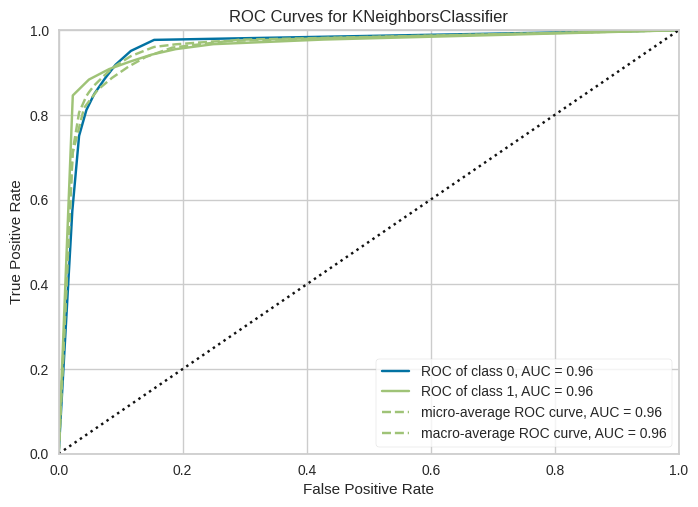

In [23]:
plot_model(tuned_modelo,plot='auc')

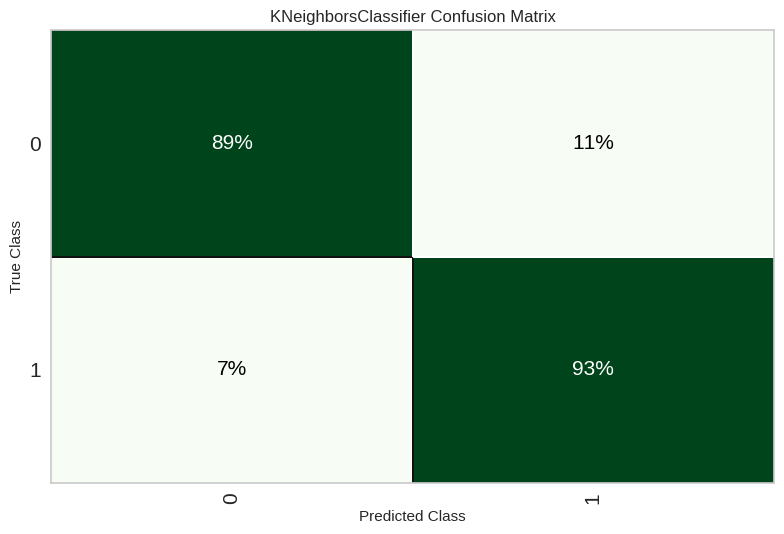

In [25]:
plot_model(tuned_modelo, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [26]:
final_modelo=finalize_model(tuned_modelo)

In [27]:
print(final_modelo)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ID', 'Edad', 'Dias_Ultima_Camp',
                                             'No_Contactos', 'emp_var_rate',
                                             'cons_price_idx', 'cons_conf_idx',
                                             'No_tdc'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('c...
                                                              missing_

In [38]:
from pycaret.classification import *
predicciones = predict_model(tuned_modelo,data=data_unusen)
predicciones.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9903,0,0.9903,1.0000,0.9951,0.0000,0.0000


,ID,Edad,Dias_Ultima_Camp,No_Contactos,emp_var_rate,cons_price_idx,cons_conf_idx,No_tdc,Contacto_telefono fijo,Mes_aug,...,Mes_sep,Dia_mon,Dia_thu,Dia_tue,Dia_wed,Resultado_Anterior_satisfactorio,Resultado_Anterior_sin contacto,y,prediction_label,prediction_score
0,22195,38,999,0,-18,92843,-50,1,False,False,...,False,False,True,False,False,False,True,1,1,1.00
1,25080,43,999,1,-18,92893,-462,1,False,False,...,False,False,False,False,False,False,False,1,1,0.75
2,24952,36,999,0,-18,92893,-462,0,False,False,...,False,False,False,False,True,False,True,1,1,1.00
3,32105,72,999,0,-17,94215,-403,0,False,False,...,False,False,False,False,False,False,True,1,1,1.00
4,30567,69,999,0,-34,92431,-269,0,False,False,...,False,False,False,False,False,False,True,1,1,1.00


**Punto relevante:** Conclusiones sobre el trabajo realizado suponiendo que el área comercial va a hacer
uso del mejor modelo construido como parte de su estrategia.  

La metodología empleada para la solución del ejercicio es CRISP-DM que consta de las siguientes etapas:

- Entendimiento del negocio
- Entendimiento de los datos
- Preparación de los datos
- Modelado
- Evaluación
- Despliegue

En este caso una vez entregados los resultados al área comercial, se recomienda hacer una retroalimentación de los mismos, para realizar calibración del modelo y sus respectivos hiperparámetros y así garantizar la mayor eficiencia del modelo entregado.

---
Cierre del ejercicio

---